# Creating a Neural Network using the Fake Register CSV file 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


## Exploratory Data Analysis 

In [4]:
df.info

<bound method DataFrame.info of           price     feature1     feature2
0    461.527929   999.787558   999.766096
1    548.130011   998.861615  1001.042403
2    410.297162  1000.070267   998.844015
3    540.382220   999.952251  1000.440940
4    546.024553  1000.446011  1000.338531
..          ...          ...          ...
995  476.526078  1000.018988   999.672732
996  457.313186   998.855379  1000.020026
997  456.720992  1001.451646   998.847606
998  403.315576  1000.771023   998.562851
999  599.367093   999.232244  1001.451407

[1000 rows x 3 columns]>

In [5]:
df.shape

(1000, 3)

In [6]:
df.isnull().sum()

price       0
feature1    0
feature2    0
dtype: int64

## Visualition 

Histogram

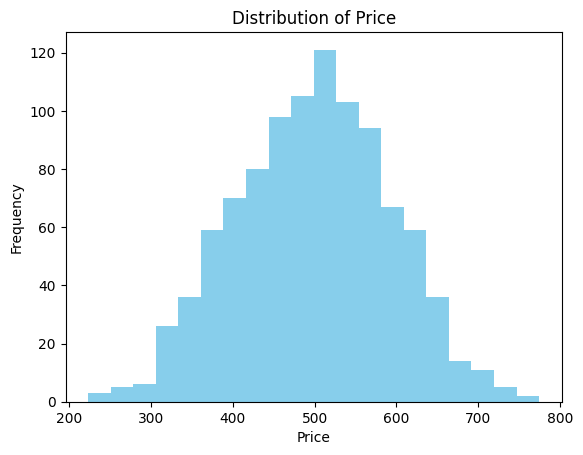

In [7]:
# Histogram for 'price'
plt.hist(df['price'], bins=20, color='skyblue')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

Scatterplot

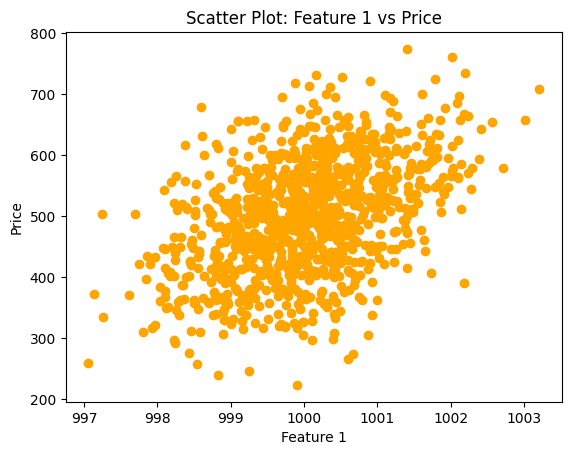

In [8]:
# Scatter plot for 'feature1' vs 'price'
plt.scatter(df['feature1'], df['price'], color='orange')
plt.xlabel('Feature 1')
plt.ylabel('Price')
plt.title('Scatter Plot: Feature 1 vs Price')
plt.show()


Box plot

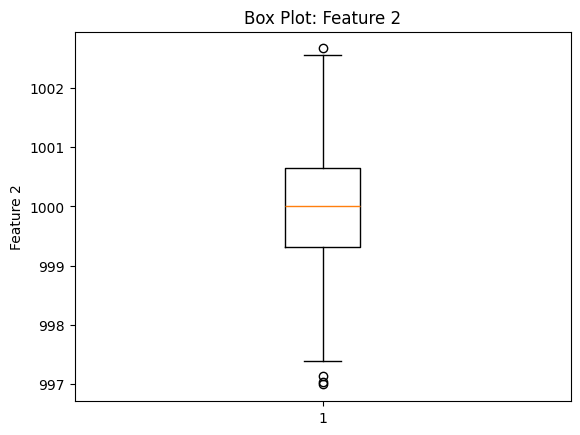

In [9]:
# Box plot for 'feature2'
plt.boxplot(df['feature2'])
plt.ylabel('Feature 2')
plt.title('Box Plot: Feature 2')
plt.show()


Pairplot 

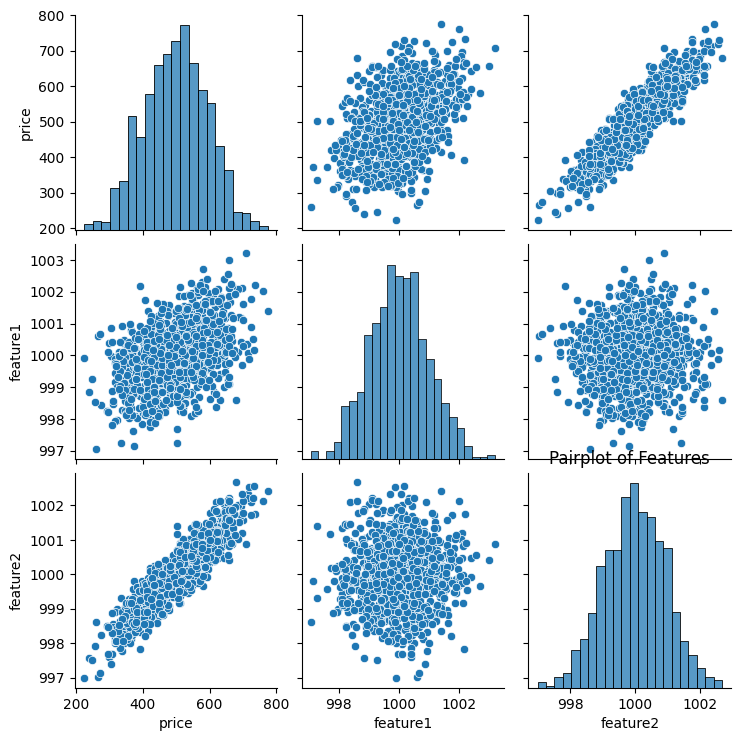

In [10]:
# Pairplot for multiple features
sns.pairplot(df)
plt.title('Pairplot of Features')
plt.show()


Heatmap

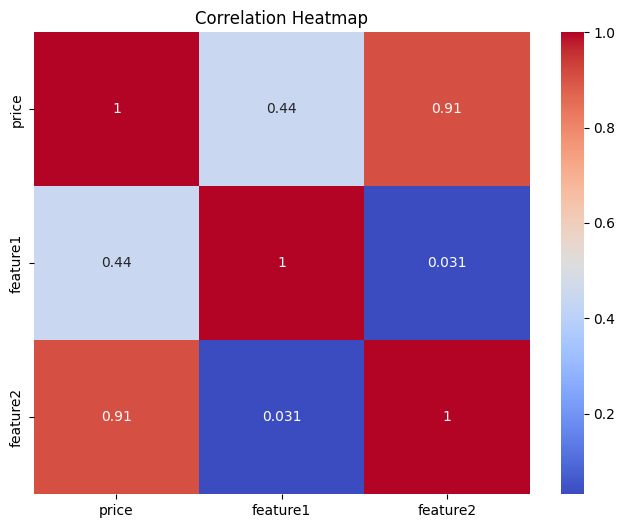

In [11]:
# Correlation heatmap
corr = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Splitting the Data

In [12]:
from sklearn.model_selection import train_test_split
# Features
X = df[['feature1','feature2']].values

# Label
y = df['price'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

Scaling the Data

In [13]:
from sklearn.preprocessing import StandardScaler

If you write help and the function the code line will provide you how does this feature work

In [14]:
help(StandardScaler)

Help on class StandardScaler in module sklearn.preprocessing._data:

class StandardScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  StandardScaler(*, copy=True, with_mean=True, with_std=True)
 |  
 |  Standardize features by removing the mean and scaling to unit variance.
 |  
 |  The standard score of a sample `x` is calculated as:
 |  
 |      z = (x - u) / s
 |  
 |  where `u` is the mean of the training samples or zero if `with_mean=False`,
 |  and `s` is the standard deviation of the training samples or one if
 |  `with_std=False`.
 |  
 |  Centering and scaling happen independently on each feature by computing
 |  the relevant statistics on the samples in the training set. Mean and
 |  standard deviation are then stored to be used on later data using
 |  :meth:`transform`.
 |  
 |  Standardization of a dataset is a common requirement for many
 |  machine learning estimators: they might behave badly if the
 |  individual feat

In [15]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
X_train

array([[ 1.69520981, -1.23023493],
       [-0.25865517, -1.6443833 ],
       [-1.82133171,  1.0027875 ],
       ...,
       [ 0.48463327,  1.55832253],
       [-1.19661304, -0.86301786],
       [ 0.57127525, -0.65376855]])

Using Tensorflow 

In [18]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [19]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

In [20]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
22/22 [==============================] - 0s 550us/step - loss: 256730.1094
Epoch 2/100
22/22 [==============================] - 0s 400us/step - loss: 256696.3125
Epoch 3/100
22/22 [==============================] - 0s 417us/step - loss: 256670.0312
Epoch 4/100
22/22 [==============================] - 0s 419us/step - loss: 256646.4062
Epoch 5/100
22/22 [==============================] - 0s 1ms/step - loss: 256623.9375
Epoch 6/100
22/22 [==============================] - 0s 683us/step - loss: 256601.7188
Epoch 7/100
22/22 [==============================] - 0s 372us/step - loss: 256579.8594
Epoch 8/100
22/22 [==============================] - 0s 384us/step - loss: 256557.9375
Epoch 9/100
22/22 [==============================] - 0s 392us/step - loss: 256536.0469
Epoch 10/100
22/22 [==============================] - 0s 354us/step - loss: 256514.1562
Epoch 11/100
22/22 [==============================] - 0s 374us/step - loss: 256492.2344
Epoch 12/100
22/22 [=======================

In [22]:
model.history.history

[256730.109375,
 256696.3125,
 256670.03125,
 256646.40625,
 256623.9375,
 256601.71875,
 256579.859375,
 256557.9375,
 256536.046875,
 256514.15625,
 256492.234375,
 256470.3125,
 256448.5,
 256426.625,
 256404.75,
 256382.875,
 256360.921875,
 256339.046875,
 256317.1875,
 256295.3125,
 256273.4375,
 256251.5625,
 256229.6875,
 256207.796875,
 256186.015625,
 256164.09375,
 256142.21875,
 256120.296875,
 256098.46875,
 256076.546875,
 256054.671875,
 256032.796875,
 256010.875,
 255989.125,
 255967.21875,
 255945.328125,
 255923.453125,
 255901.671875,
 255879.765625,
 255857.9375,
 255836.046875,
 255814.21875,
 255792.296875,
 255770.421875,
 255748.65625,
 255726.859375,
 255705.0,
 255683.125,
 255661.296875,
 255639.359375,
 255617.546875,
 255595.75,
 255573.890625,
 255552.0,
 255530.1875,
 255508.25,
 255486.453125,
 255464.65625,
 255442.859375,
 255421.0,
 255399.171875,
 255377.328125,
 255355.421875,
 255333.640625,
 255311.84375,
 255289.984375,
 255268.109375,
 255246.3

In [23]:
loss = model.history.history['loss']

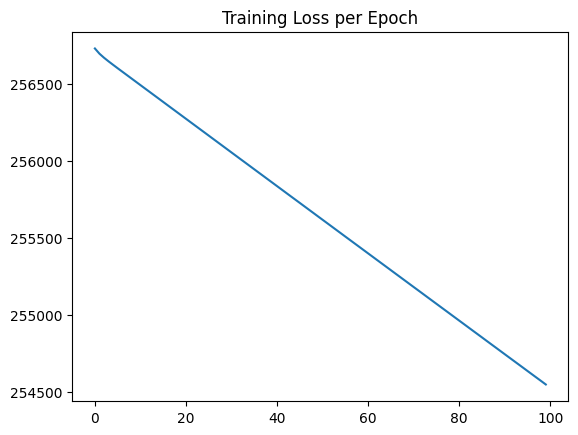

In [27]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch")
plt.show()

In [28]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)


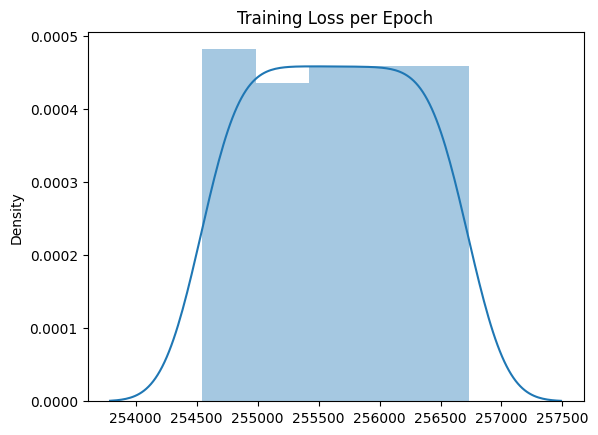

In [29]:
sns.distplot(a=loss)
plt.title("Training Loss per Epoch")
plt.show()

Evaluration

In [30]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [31]:
training_score

254536.734375

In [32]:
test_score

256962.875

Creating a dataframe and saving the Evaluation in a dataframe

In [34]:
test_predictions = model.predict(X_test)
test_predictions

10/10 [==============================] - 0s 388us/step


array([[2.2078414],
       [2.2078414],
       [2.2078414],
       [2.2078414],
       [2.2078414],
       [2.2078414],
       [2.2078414],
       [2.2078414],
       [2.2078414],
       [2.2078414],
       [2.2078414],
       [2.2078414],
       [2.2078414],
       [2.2078414],
       [2.2078414],
       [2.2078414],
       [2.2078414],
       [2.2078414],
       [2.2078414],
       [2.2078414],
       [2.2078414],
       [2.2078414],
       [2.2078414],
       [2.2078414],
       [2.2078414],
       [2.2078414],
       [2.2078414],
       [2.2078414],
       [2.2078414],
       [2.2078414],
       [2.2078414],
       [2.2078414],
       [2.2078414],
       [2.2078414],
       [2.2078414],
       [2.2078414],
       [2.2078414],
       [2.2078414],
       [2.2078414],
       [2.2078414],
       [2.2078414],
       [2.2078414],
       [2.2078414],
       [2.2078414],
       [2.2078414],
       [2.2078414],
       [2.2078414],
       [2.2078414],
       [2.2078414],
       [2.2078414],


In [35]:
pred_df = pd.DataFrame(y_test,columns=['y_test'])
pred_df

,y_test
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [36]:
test_predictions = pd.Series(test_predictions.reshape(300,))
test_predictions

0      2.207841
1      2.207841
2      2.207841
3      2.207841
4      2.207841
         ...   
295    2.207841
296    2.207841
297    2.207841
298    2.207841
299    2.207841
Length: 300, dtype: float32

In [37]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [38]:
pred_df.columns = ['y_test','model_predictions']

In [39]:
pred_df

,y_test,model_predictions
0,402.296319,2.207841
1,624.156198,2.207841
2,582.455066,2.207841
3,578.588606,2.207841
4,371.224104,2.207841
...,...,...
295,525.704657,2.207841
296,502.909473,2.207841
297,612.727910,2.207841
298,417.569725,2.207841


Comparison 

<Axes: xlabel='y_test', ylabel='model_predictions'>

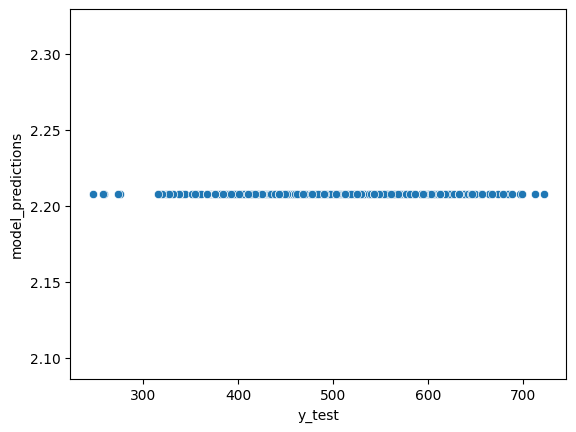

In [40]:
sns.scatterplot(x='y_test',y='model_predictions',data=pred_df)